## ML model training and evaluation - 04

### Dataset - Normalized with Z-Score method / With Redshift

#### Random Forest algorithm 

In [1]:
import pandas as pd # for Dataframe manupulation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
import numpy as np # for arrays manipulation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
# to import evaluation metrices

In [2]:
df_zc_r = pd.read_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_zc_r.csv")

In [3]:
df_zc_r

,alpha,delta,u,g,r,i,z,redshift,class
0,-0.074487,1.289303,0.026105,0.028179,0.278991,0.019125,0.000182,-0.173181,0
1,-0.698904,0.750608,-0.045018,-0.011422,0.289704,0.731347,0.051148,-0.779582,0
2,-1.794078,-0.327996,0.011324,0.026022,0.588107,1.068690,0.042780,-0.399170,0
3,-0.067306,-0.235023,-0.027930,-0.040495,-1.226457,-1.264591,-0.051649,-0.610805,0
4,0.376113,-1.094194,-0.046110,-0.061310,-1.633565,-1.662025,-0.067928,-0.636052,0
...,...,...,...,...,...,...,...,...,...
56878,0.285100,0.747929,0.003668,0.016591,0.619789,0.824884,0.044223,-0.779929,2
56879,-1.680821,-1.196559,0.043405,0.010067,-0.219655,-0.664877,-0.033554,-0.779631,2
56880,0.249313,0.582905,-0.052432,-0.048213,-1.017237,-0.879015,-0.028594,-0.780040,2
56881,-1.753353,0.525410,-0.089405,-0.091785,-2.184998,-1.989771,-0.076964,-0.779651,2


In [4]:
x = df_zc_r.drop("class",axis='columns')
x.head()

,alpha,delta,u,g,r,i,z,redshift
0,-0.074487,1.289303,0.026105,0.028179,0.278991,0.019125,0.000182,-0.173181
1,-0.698904,0.750608,-0.045018,-0.011422,0.289704,0.731347,0.051148,-0.779582
2,-1.794078,-0.327996,0.011324,0.026022,0.588107,1.068690,0.042780,-0.399170
3,-0.067306,-0.235023,-0.027930,-0.040495,-1.226457,-1.264591,-0.051649,-0.610805
4,0.376113,-1.094194,-0.046110,-0.061310,-1.633565,-1.662025,-0.067928,-0.636052


In [5]:
y = df_zc_r["class"]
y

0        0
1        0
2        0
3        0
4        0
        ..
56878    2
56879    2
56880    2
56881    2
56882    2
Name: class, Length: 56883, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42, stratify=y)

In [7]:
from sklearn.ensemble import RandomForestClassifier

# initializing model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = model_rf.predict(x_test)


In [9]:
from sklearn.metrics import confusion_matrix

# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1837,   45,   14],
       [  96, 1800,    0],
       [   1,    0, 1896]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

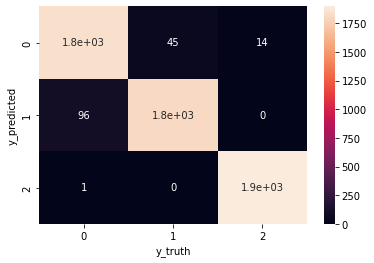

In [10]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [11]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9725786605730357
Precision: 0.9727082647470384
Recall: 0.9725739323396851
F1 Score: 0.9725461206945981


#### Support Vector Machine (SVM) algorithm

In [13]:
from sklearn.svm import SVC #importing SVC class

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# training the SVM model
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(x_train, y_train)


SVC(C=1, kernel='linear')

In [14]:
y_pred = model_svm.predict(x_test)

In [15]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1790,   70,   36],
       [ 147, 1748,    1],
       [   0,    0, 1897]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

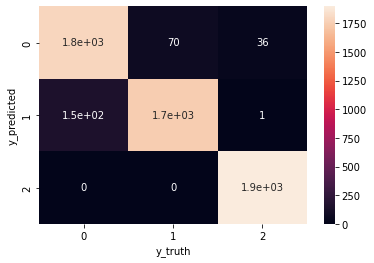

In [16]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [17]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9553524345227632
Precision: 0.9554914210638638
Recall: 0.9553445850914205
F1 Score: 0.9552131282700648


#### Extremely Randomized Trees (ERT) algorithm

In [19]:
from sklearn.ensemble import ExtraTreesClassifier #importing extra trees classifier

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the ERT model and fit it to the training data
model_ert = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
model_ert.fit(x_train, y_train)

ExtraTreesClassifier()

In [20]:
y_pred = model_ert.predict(x_test)

In [21]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1840,   35,   21],
       [ 108, 1787,    1],
       [   0,    0, 1897]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

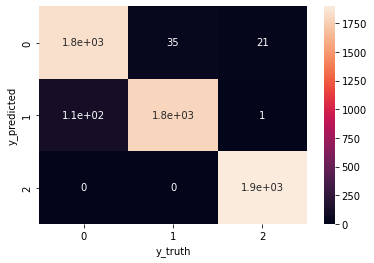

In [22]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [23]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.97099666022148
Precision: 0.9712948525069355
Recall: 0.9709915611814347
F1 Score: 0.970946802930072


####  Decision Tree algorithm

In [25]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the decision tree model and fit it to the training data
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = model_dt.predict(x_test)

In [27]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1767,  127,    2],
       [ 103, 1793,    0],
       [   5,    0, 1892]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

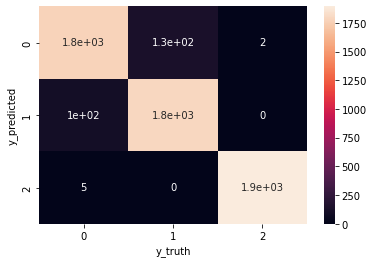

In [28]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [29]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.958340657409035
Precision: 0.9583994001525284
Recall: 0.9583337967195223
F1 Score: 0.9583443112985925


#### KNN algorithm

In [31]:
from sklearn.neighbors import KNeighborsClassifier # importing KNN module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the knn model and fit it to the training data
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = model_knn.predict(x_test)

In [33]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1752,   40,  104],
       [ 139, 1748,    9],
       [  62,    0, 1835]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

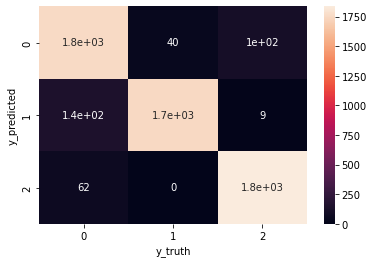

In [34]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [35]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9377746528388118
Precision: 0.9389006116682802
Recall: 0.9377694590689125
F1 Score: 0.9379403957689335
